In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# plt.style.use(['dark_background', 'bmh'])
plt.style.use(['seaborn-v0_8-whitegrid', 'bmh'])
font = {'family' : 'monospace',
        'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)
plt.rc('axes', facecolor='w')
plt.rc('figure', facecolor='w')
plt.rc('figure', figsize= (6, 3), dpi=150)

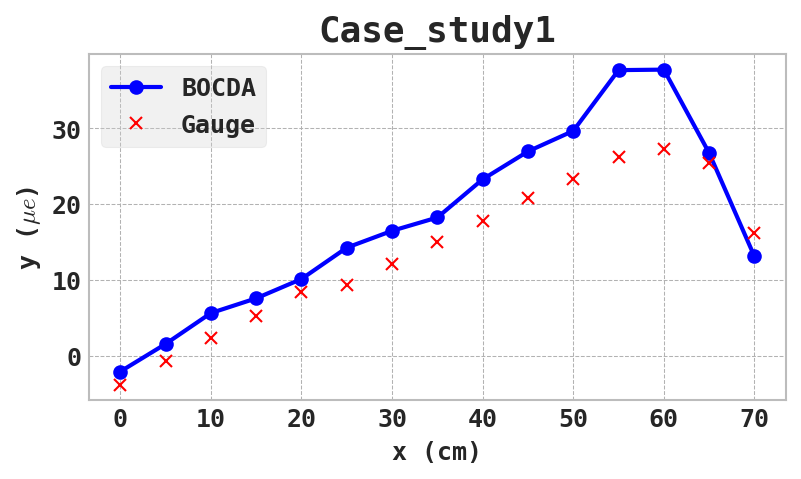

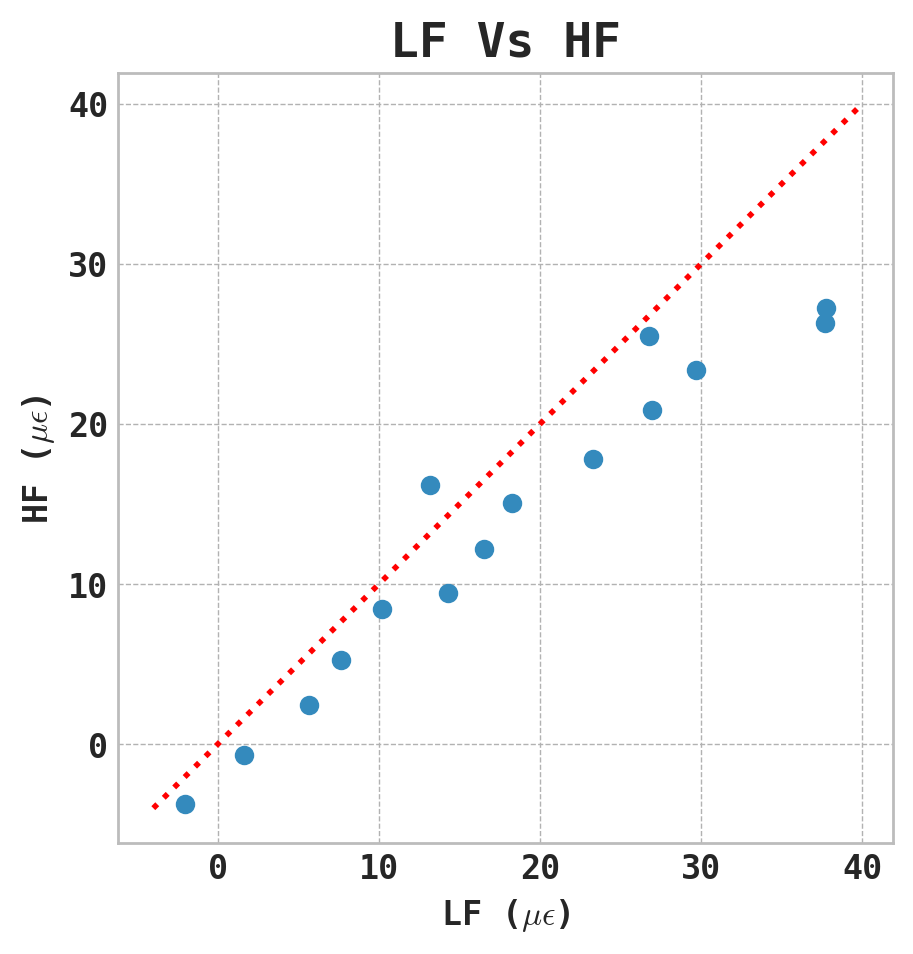

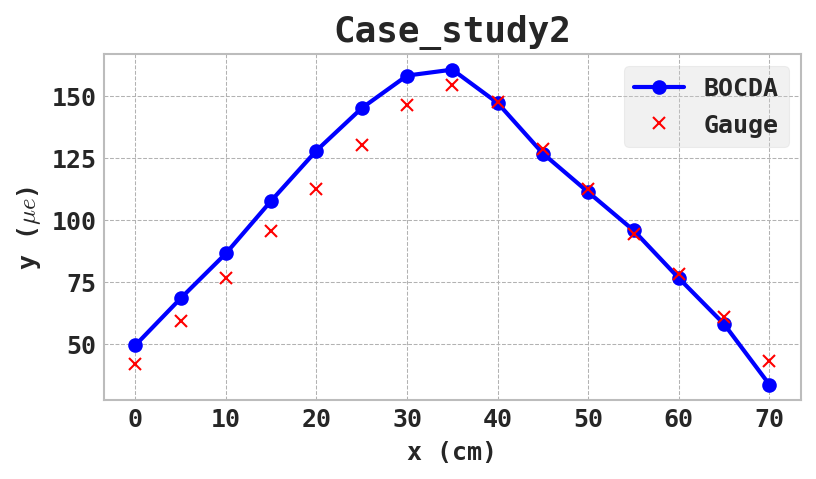

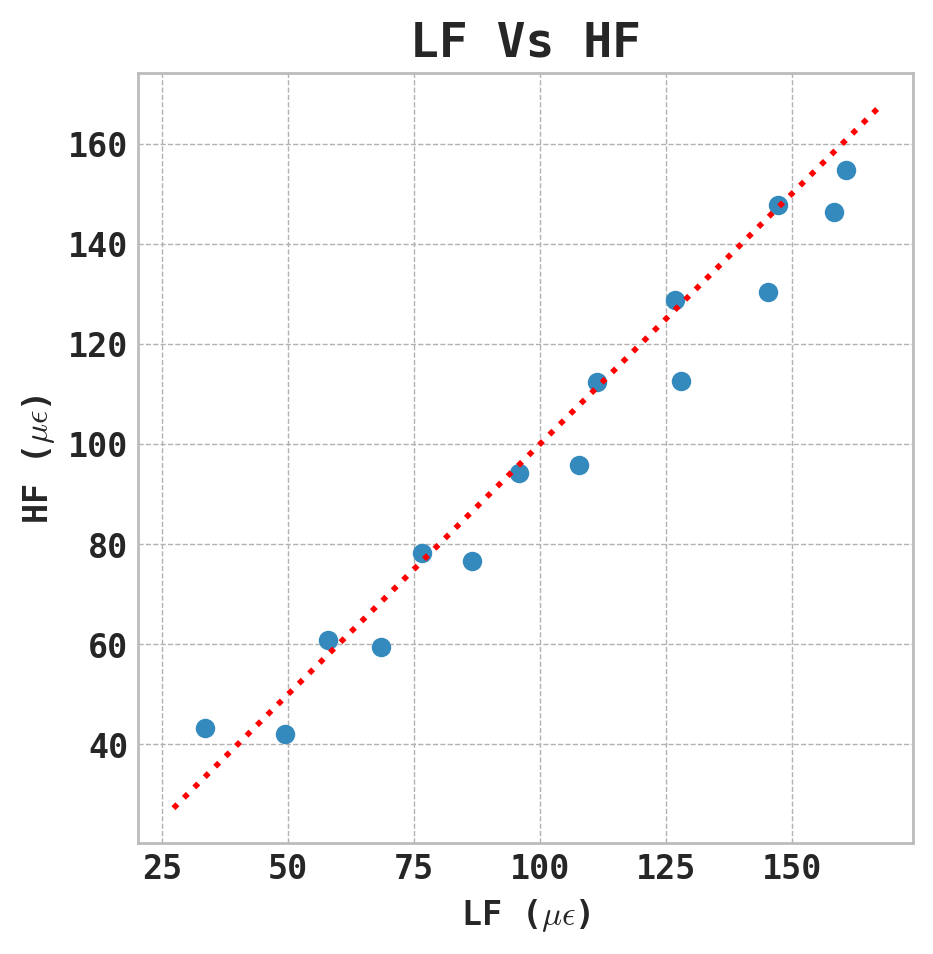

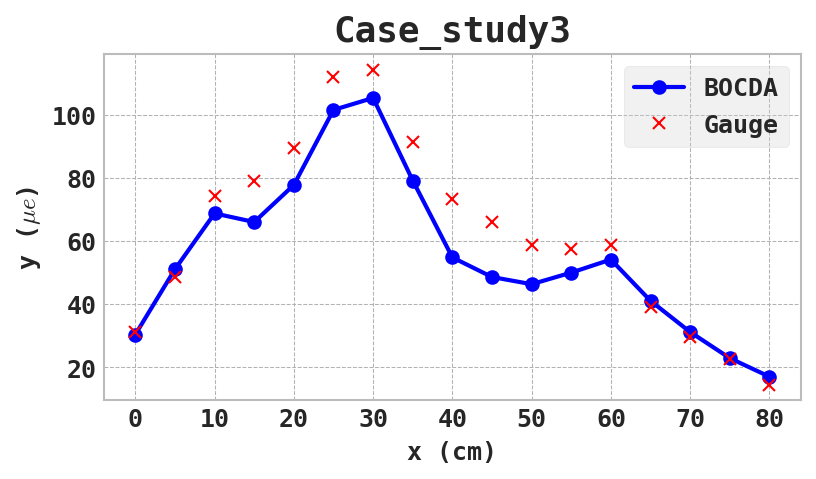

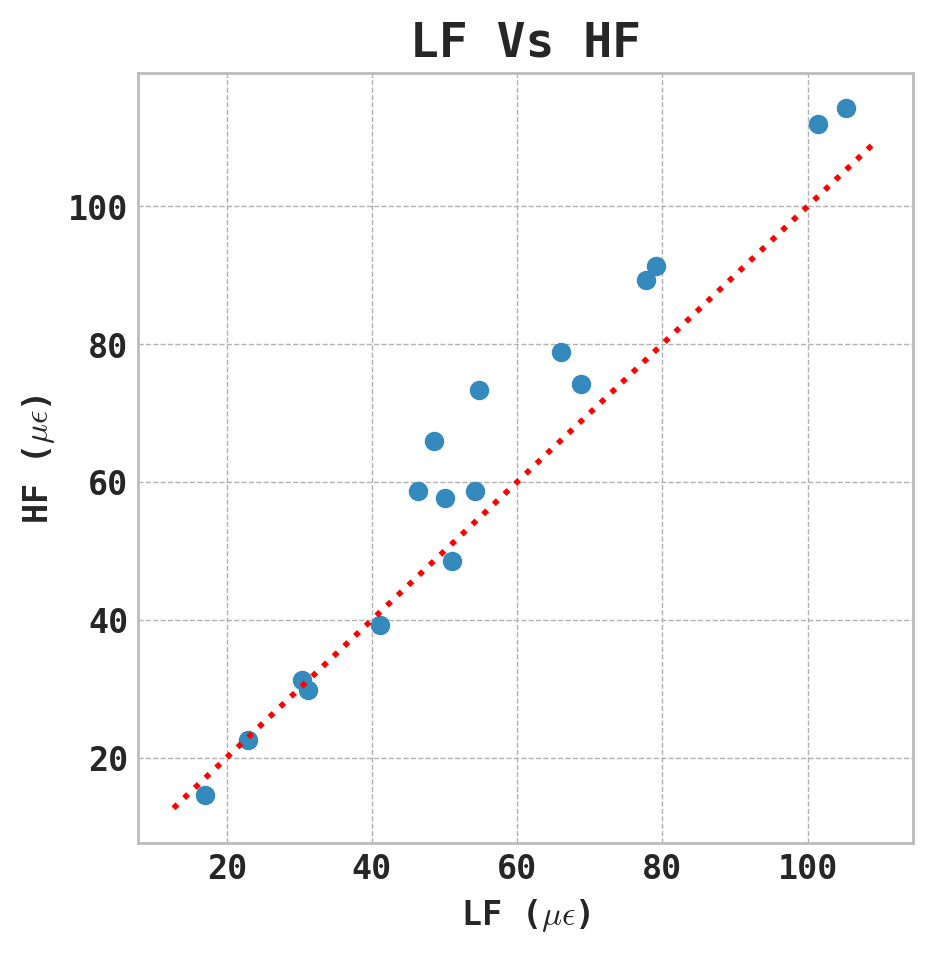

In [4]:
strain = {}

for i_fn in range(3):
    fn = f'Case_study{i_fn + 1}.mat'
    mat_contents  = loadmat(fn)

    if i_fn == 2:
        x_BOCDA, y_BOCDA = mat_contents['BOCDA'][0][0][0], mat_contents['BOCDA'][0][0][1]
        x_Gauge, y_Gauge = mat_contents['GAUGE'][0][0][0], mat_contents['GAUGE'][0][0][1]
    else:
        x_BOCDA, y_BOCDA = mat_contents['BOCDA'][0][0][1], mat_contents['BOCDA'][0][0][0]
        x_Gauge, y_Gauge = mat_contents['GAUGE'][0][0][1], mat_contents['GAUGE'][0][0][0]
    
    x_BOCDA, y_BOCDA = x_BOCDA.reshape(-1, 1), y_BOCDA.mean(axis = 0).reshape(-1, 1)
    x_Gauge, y_Gauge= x_Gauge.reshape(-1, 1), y_Gauge.mean(axis = 0).reshape(-1, 1)
    
    df1 = y_BOCDA
    df2 = y_Gauge

    df1 = np.concatenate([df1, x_BOCDA], axis = 1)
    df2 = np.concatenate([df2, x_Gauge], axis = 1)

    strain['BOCDA'] = pd.DataFrame(df1)
    strain['GAUGE'] = pd.DataFrame(df2)

    strain['BOCDA'].columns = [0, 'x']
    strain['GAUGE'].columns = [0, 'x']

    plt.plot(strain['BOCDA']['x'], y_BOCDA, 'bo-', label = 'BOCDA')
    plt.plot(strain['GAUGE']['x'], y_Gauge, 'rx', label = 'Gauge')
    plt.title(f'Case_study{i_fn + 1}', weight = 'bold')
    plt.xlabel('x (cm)', weight = 'bold')
    plt.ylabel('y ($\mu e$)', weight = 'bold')
    plt.legend(frameon = True, facecolor = 'lightgrey', framealpha=0.3, prop=dict(weight='bold'))
    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    plt.show()

    plt.figure(figsize = (5, 5), dpi = 200)
    plt.plot(y_BOCDA, y_Gauge, 'o', label = 'BOCDA')
    xmin_, xmax_ = plt.gca().get_xlim()
    plt.plot([xmin_, xmax_], [xmin_, xmax_], 'r:', label = 'x = y')
    plt.xlabel('LF ($\mu \epsilon$)', weight = 'bold')
    plt.ylabel('HF ($\mu \epsilon$)', weight = 'bold')
    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    plt.title(f'LF Vs HF', weight = 'bold')
    plt.show()

    strain['BOCDA'].to_csv(f'simplebeam_strain_LF{i_fn}.csv', index=False)
    strain['GAUGE'].to_csv(f'simplebeam_strain_HF{i_fn}.csv', index=False)